**Exercice 2   — KNN Naïve Bayes and Logistic Regression**

1- charger les données du "BankData.csv",

In [10]:
import pandas as pd

data = pd.read_csv("BankData.csv")


2- Obtenir et afficher des informations à partir des données et nettoyer les données.

In [11]:
print(data.head())

print(data.info())


   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total

Ensuite, nous allons nettoyer les données. Nous allons vérifier s'il y a des valeurs manquantes dans les données.

In [12]:
print(data.isnull().sum())


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


S'il y a des valeurs manquantes, nous pouvons utiliser la fonction fillna() pour remplacer les valeurs manquantes par une valeur donnée.

In [13]:
data.fillna(0, inplace=True)


3-  Visualisez les données

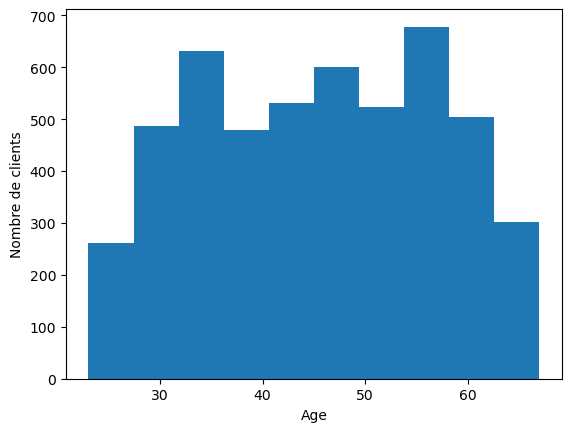

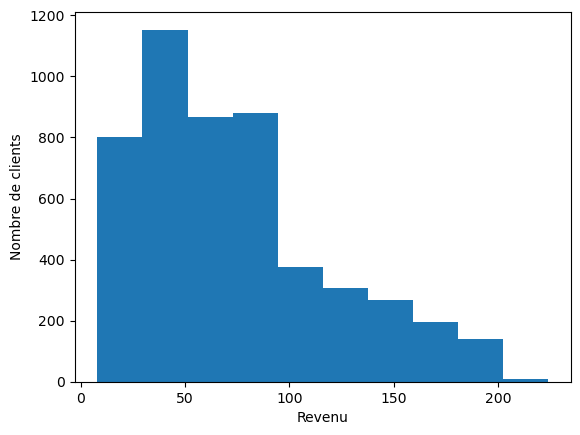

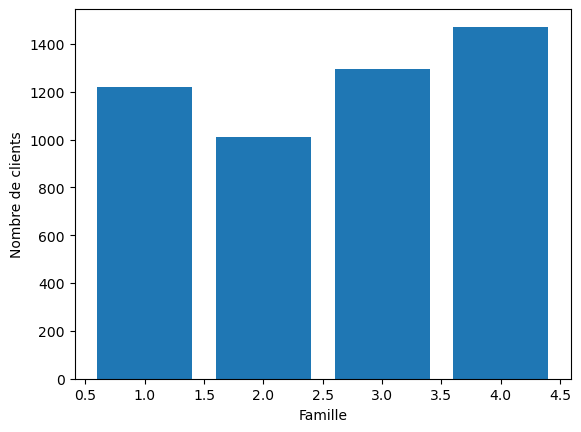

In [14]:
import matplotlib.pyplot as plt

# Histogramme de l'âge
plt.hist(data["Age"])
plt.xlabel("Age")
plt.ylabel("Nombre de clients")
plt.show()

# Histogramme du revenu
plt.hist(data["Income"])
plt.xlabel("Revenu")
plt.ylabel("Nombre de clients")
plt.show()

# Diagramme en barres de la famille
plt.bar(data["Family"].unique(), data["Family"].value_counts())
plt.xlabel("Famille")
plt.ylabel("Nombre de clients")
plt.show()


4- Créer les  modèles

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Diviser les données en données d'entraînement et de test
X = data.drop(["Personal Loan"], axis=1)
y = data["Personal Loan"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Bayésien Naïve
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

# Régression Logistique
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)


5-  Comparer ces trois modèles

In [16]:
print("KNN accuracy:", knn_accuracy)
print("Naive Bayes accuracy:", nb_accuracy)
print("Logistic Regression accuracy:", lr_accuracy)


KNN accuracy: 0.896
Naive Bayes accuracy: 0.901
Logistic Regression accuracy: 0.908


6.  Visualiser les résultats comparatifs graphiquement.

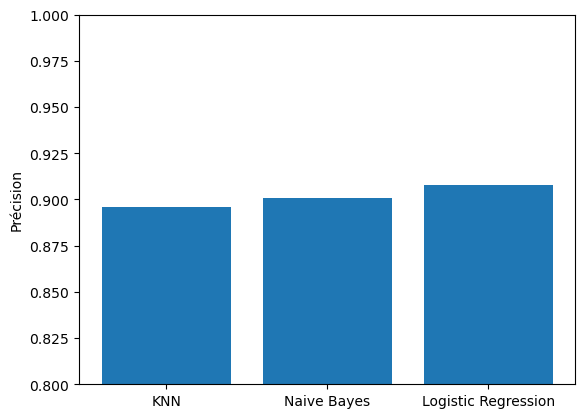

In [17]:
models = ["KNN", "Naive Bayes", "Logistic Regression"]
accuracies = [knn_accuracy, nb_accuracy, lr_accuracy]

plt.bar(models, accuracies)
plt.ylim([0.8, 1])
plt.ylabel("Précision")
plt.show()


7.  Conclusion

Dans cette exercice, nous avons chargé les données "BankData.csv" et nettoyé les données en vérifiant et remplaçant les valeurs manquantes. Ensuite, nous avons visualisé les données en utilisant des graphiques Matplotlib. Nous avons créé trois modèles: KNN, Bayésien Naïve et Régression Logistique, et comparé les précisions de ces modèles. Nous avons également visualisé les précisions des différents modèles en utilisant un graphique à barres. En fonction des précisions, nous pouvons conclure que la Régression Logistique est le modèle le plus précis pour cette tâche.